## Import the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('order.csv')
df1 = pd.read_csv('menu.csv')
df2 = pd.read_csv('detail.csv')

In [2]:
df

,date,order_id,total
0,2023-01-01,10001,400
1,2023-01-01,10002,750
2,2023-01-01,10003,1020
3,2023-01-01,10004,780
4,2023-01-01,10005,1000
...,...,...,...
3824,2023-05-16,13825,790
3825,2023-05-16,13826,810
3826,2023-05-16,13827,1250
3827,2023-05-16,13828,970


In [3]:
df1

,product_id,product_name,category,price
0,66,Pork Xiaolongbao,Xiaolongbao,220
1,67,Crab Roe and Pork Xiaolongbao,Xiaolongbao,370
2,677,Chicken Xiaolongbao,Xiaolongbao,230
3,665,Green Squash and Shrimp Xiaolongbao,Xiaolongbao,340
4,71,Steamed Vegetable and Ground Pork Dumplings,Dumplings & Shao Mai,220
5,72,Steamed Shrimp and Pork Dumplings,Dumplings & Shao Mai,270
6,73,Steamed Vegetarian Mushroom Dumplings,Dumplings & Shao Mai,250
7,74,Steamed Fish Dumplings,Dumplings & Shao Mai,250
8,83,Pork Buns,Buns,90
9,82,Vegetable and Ground Pork Buns,Buns,90


In [4]:
df2

,order_id,item_id,price
0,10001,93,70
1,10001,677,230
2,10001,97,100
3,10002,31,190
4,10002,72,270
...,...,...,...
14679,13829,72,270
14680,13829,67,370
14681,13829,67,370
14682,13829,97,100


## Merge the Dataframes into One

In [5]:
merged_df = pd.merge(df2, df1[['product_id', 'product_name', 'category']], left_on='item_id', right_on='product_id', how='left')
merged_df = pd.merge(merged_df, df[['order_id', 'date']], on='order_id', how='left')

# Replace item_id with product_name
merged_df = merged_df.drop(['item_id'], axis=1)  # Remove redundant column
merged_df = merged_df.rename(columns={'product_name': 'item_name'})  # Rename the column

df2 = merged_df

In [6]:
df2['price'] = df2['price'] * 0.03
df2
# Converting TWD to Euro

,order_id,price,product_id,item_name,category,date
0,10001,2.1,93,Steamed Red Bean Rick Cake,Desserts,2023-01-01
1,10001,6.9,677,Chicken Xiaolongbao,Xiaolongbao,2023-01-01
2,10001,3.0,97,Steamed Red Bean Rice Cake with Walnuts,Desserts,2023-01-01
3,10002,5.7,31,Shredded Pork Fried Rice,Fried Rice,2023-01-01
4,10002,8.1,72,Steamed Shrimp and Pork Dumplings,Dumplings & Shao Mai,2023-01-01
...,...,...,...,...,...,...
14679,13829,8.1,72,Steamed Shrimp and Pork Dumplings,Dumplings & Shao Mai,2023-05-17
14680,13829,11.1,67,Crab Roe and Pork Xiaolongbao,Xiaolongbao,2023-05-17
14681,13829,11.1,67,Crab Roe and Pork Xiaolongbao,Xiaolongbao,2023-05-17
14682,13829,3.0,97,Steamed Red Bean Rice Cake with Walnuts,Desserts,2023-05-17


## Start of EDA

## Market Basket Analysis

In [7]:
# Group the merged dataframe by order_id and aggregate the item_names as a list
grouped_df = merged_df.groupby('order_id')['item_name'].apply(list)

# Initialize an empty dictionary to store item co-occurrence counts
co_occurrence_counts = {}

# Iterate over each order's item list and update the co-occurrence counts
for items in grouped_df:
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            pair = frozenset([items[i], items[j]])  # Create a frozenset for the item pair
            co_occurrence_counts[pair] = co_occurrence_counts.get(pair, 0) + 1

# Sort the co-occurrence counts in descending order
sorted_counts = sorted(co_occurrence_counts.items(), key=lambda x: x[1], reverse=True)

for pair, count in sorted_counts[:5]:
    item1, item2 = pair
    print(f"Item Pair: {item1} and {item2}, Count: {count}")


Item Pair: Vegetable and Ground Pork Buns and Crab Roe and Pork Xiaolongbao, Count: 220
Item Pair: Green Squash and Shrimp Xiaolongbao and Pork Xiaolongbao, Count: 209
Item Pair: Steamed Red Bean Rick Cake and Crab Roe and Pork Xiaolongbao, Count: 206
Item Pair: Pork Xiaolongbao and Shredded Pork Fried Rice, Count: 203
Item Pair: Steamed Red Bean Rice Cake with Walnuts and Crab Roe and Pork Xiaolongbao, Count: 202


## Sum up sales for each Day

In [8]:
daily_sales = df2.groupby('date')['price'].sum().reset_index()

# Sort the dataframe by total sales in descending order
daily_sales_sorted = daily_sales.sort_values('price', ascending=False)

# Display the dataframe with the daily sales
daily_sales_sorted


,date,price
120,2023-05-01,913.8
129,2023-05-10,899.1
131,2023-05-12,892.5
121,2023-05-02,888.0
102,2023-04-13,887.7
...,...,...
37,2023-02-07,503.7
53,2023-02-23,501.6
28,2023-01-29,484.8
136,2023-05-17,48.3


In [9]:
# 2023-05-17 , 2023-03-31 have significant amount less Revenue then the Rest

In [10]:
df2['price'].describe()

count    14684.000000
mean         5.978507
std          2.810791
min          2.100000
25%          3.000000
50%          6.600000
75%          7.500000
max         11.100000
Name: price, dtype: float64

## 4 weeks with the Most Revenue 

In [11]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df2['week'] = df2['date'].dt.strftime('%Y-%U')
weekly_revenue = df2.groupby('week')['price'].sum()

# Sort weeks based on revenue in descending order
sorted_weeks = weekly_revenue.sort_values(ascending=False)

# Select the top four weeks with highest revenue
top_four_weeks = sorted_weeks.head(4)


top_four_weeks

week
2023-19    5576.7
2023-17    5563.8
2023-16    5560.2
2023-15    5486.4
Name: price, dtype: float64

## Average Items per Order

In [12]:
order_item_counts = df2.groupby('order_id')['product_id'].count()

# Calculate the average number of items per order
average_items_per_order = order_item_counts.mean()

average_items_per_order

3.834943849569078

## Plot Revenue per Day

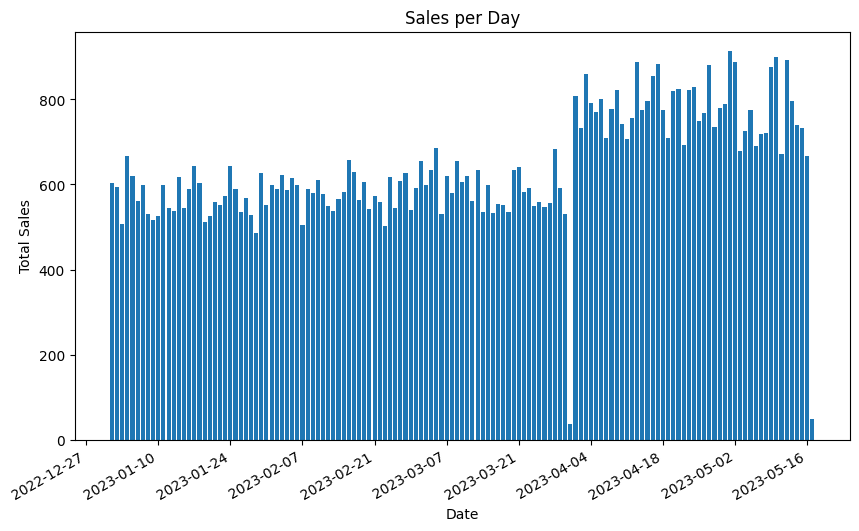

In [13]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

# Sort the dataframe by date in ascending order
daily_sales_sorted = daily_sales_sorted.sort_values('date')

# Convert the 'date' column to datetime format
daily_sales_sorted['date'] = pd.to_datetime(daily_sales_sorted['date'])

# Plot the sales per day as a bar chart
plt.bar(daily_sales_sorted['date'], daily_sales_sorted['price'])

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Sales per Day')

# Set the locator and formatter for x-axis labels
locator = mdates.WeekdayLocator(interval=2)
formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()

plt.show()

## Orders per Day

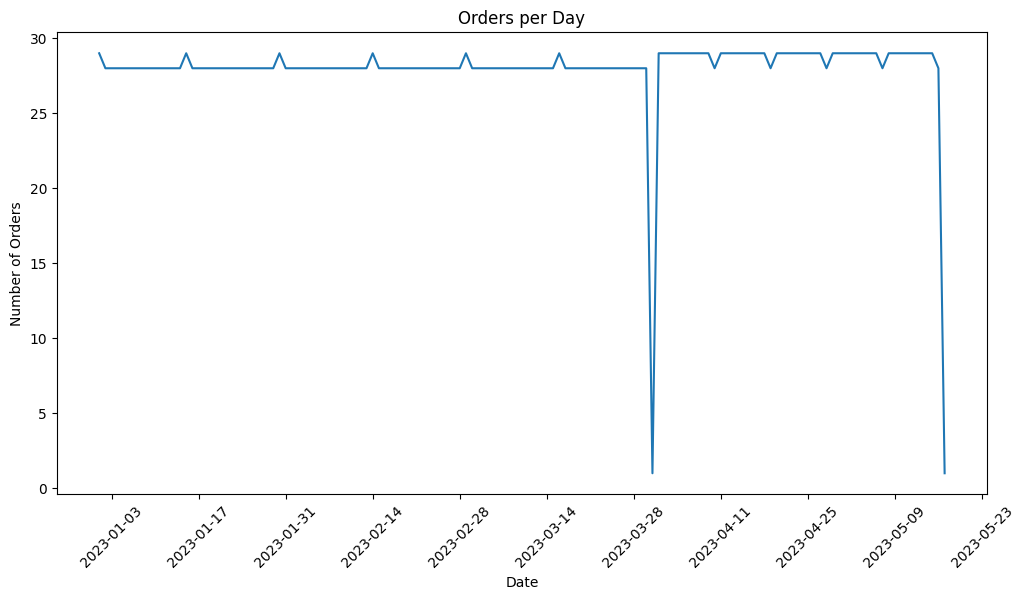

In [14]:
import matplotlib.dates as mdates

# Assuming the given data is stored in a DataFrame called "df"
# Convert the "date" column to datetime data type
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')

# Group the data by date and count the number of orders per day
daily_orders = df2.groupby('date')['order_id'].nunique()

# Plot the time series of orders per day
plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values)
plt.title('Orders per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Set the x-axis to display every 2 weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.show()

## Revenue by Category

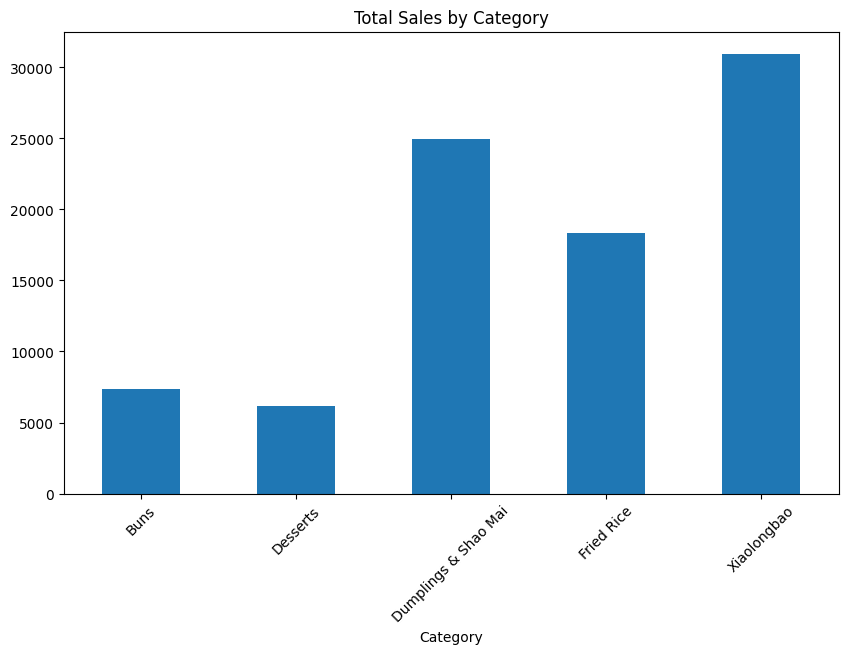

In [15]:
category_sales = df2.groupby("category")["price"].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_sales.plot(kind="bar")
plt.xlabel("Category")
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

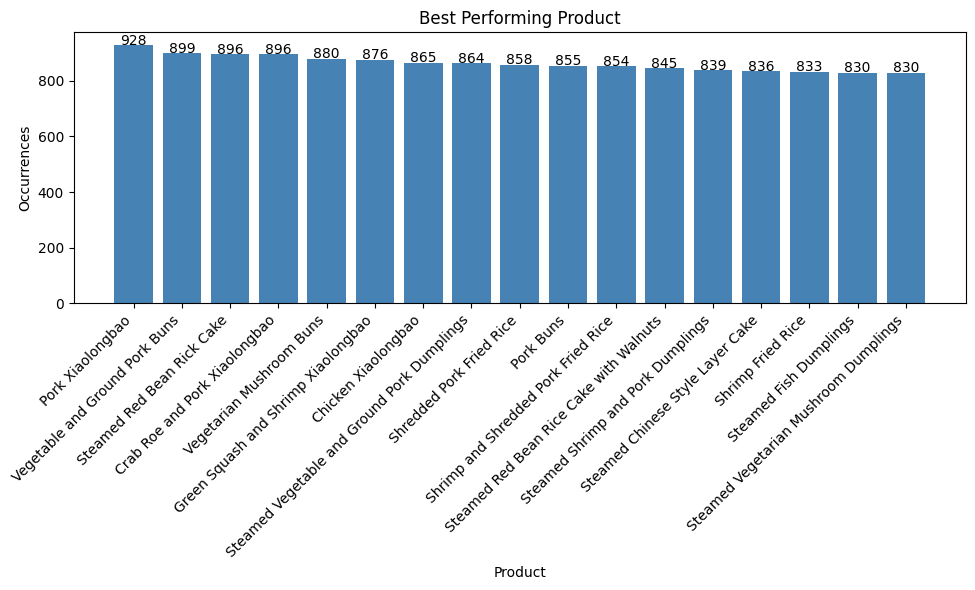

In [16]:
# Count the occurrences of each product
product_counts = df2['item_name'].value_counts().reset_index()

# Rename the columns
product_counts.columns = ['item_name', 'count']

# Sort the products based on the count in descending order
sorted_products = product_counts.sort_values('count', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_products['item_name'], sorted_products['count'], color='steelblue')

# Customize the plot
plt.xlabel('Product')
plt.ylabel('Occurrences')
plt.title('Best Performing Product')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the count as text on top of each bar
for i, value in enumerate(sorted_products['count']):
    plt.text(i, value + 1, str(value), ha='center')

# Display the plot
plt.tight_layout()
plt.show()

## Order Quantity by Category

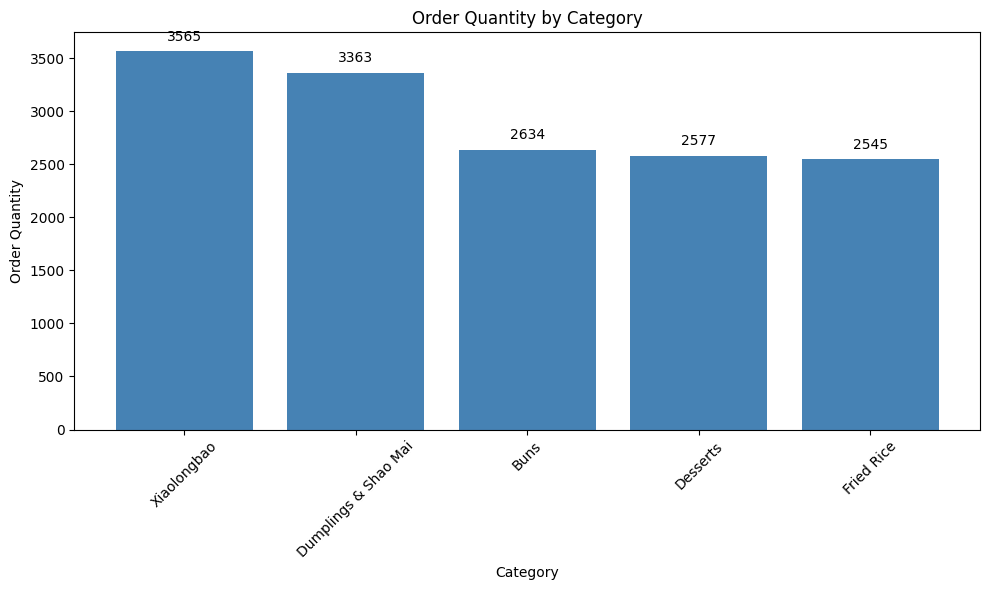

In [17]:
# Group the data by category and calculate order quantity and average price
category_stats = df2.groupby('category').agg({'order_id': 'count', 'price': 'mean'})

# Sort the categories by order quantity in descending order
sorted_categories = category_stats.sort_values('order_id', ascending=False)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sorted_categories.index, sorted_categories['order_id'], color='steelblue')

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Order Quantity')
ax.set_title('Order Quantity by Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the average price as text on top of each bar
for i, value in enumerate(sorted_categories['order_id']):
    ax.text(i, value + 100, str(round(value)), ha='center')

# Display the plot
plt.tight_layout()
plt.show()

## Show Average Price per Product in each Category

In [18]:
categories = df2['category'].unique()

# Calculate the average price for each category
category_avg_price = {}
for category in categories:
    subset = df2[df2['category'] == category]
    avg_price = subset['price'].mean()
    category_avg_price[category] = avg_price

# Sort the categories based on average price in descending order
sorted_categories = sorted(category_avg_price, key=category_avg_price.get, reverse=True)

# Print the average price for each category in descending order
for category in sorted_categories:
    print(category, ':', category_avg_price[category])

Xiaolongbao : 8.688387096774193
Dumplings & Shao Mai : 7.418465655664584
Fried Rice : 7.197642436149314
Buns : 2.8002277904328015
Desserts : 2.395110593713621


In [19]:
## You can Observe that the most Expensive Category is also the most ordered.

## Best Performing Day for each Product

In [20]:
daily_product_stats = df2.groupby([pd.Grouper(key='date', freq='D'), 'item_name']).size().reset_index(name='order_count')
top_products = daily_product_stats.sort_values('order_count', ascending=False).groupby('item_name').head(1)
top_products

,date,item_name,order_count
2041,2023-05-02,Crab Roe and Pork Xiaolongbao,18
1604,2023-04-06,Shrimp Fried Rice,17
1619,2023-04-07,Pork Xiaolongbao,16
2217,2023-05-12,Shrimp and Shredded Pork Fried Rice,16
2009,2023-04-30,Pork Buns,16
1320,2023-03-19,Vegetable and Ground Pork Buns,15
2291,2023-05-16,Steamed Vegetable and Ground Pork Dumplings,15
1889,2023-04-23,Green Squash and Shrimp Xiaolongbao,15
1790,2023-04-17,Shredded Pork Fried Rice,14
389,2023-01-23,Vegetarian Mushroom Buns,14
